In [84]:
import numpy as np
import cv2 as cv
import os
import json
import matplotlib.pyplot as plt
from PIL import Image


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Given an image containing the lander, generate range and bearing measurements to the lander.


In [85]:
# data_path = os.path.expanduser("~/LunarAutonomyChallenge/output/data_collection_1")
data_path = os.path.expanduser("~/LunarAutonomyChallenge/output/lander_closeups")

#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/31.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/65.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/97.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/147.png
# /home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/181.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/265.png
# /home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/353.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/369.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/411.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/457.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/493.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/545.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/1199.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/1269.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/1665.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/1705.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/1751.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/2043.png

#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/799.png
# /home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/867.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/1111.png


#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/617.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/709.png
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/763.png

i = [31, 65, 97, 147, 181, 265, 353, 369, 411, 457, 493, 545, 1199, 1269, 1665, 1705, 1751, 2043, 799, 867, 1111, 617, 709, 763]

## ---- TEST IMAGES FOR FIDUCIAL SHAPE SEG -------------------------------
# data_collection_1
# true examples
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/35.png # group D
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/124.png # group D
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/1527.png # group A
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/1620.png # group A

# false examples
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/328.png
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/619.png
# /home/lac/LunarAutonomyChallenge/output/data_collection_1/front_left/974.png

# lander_closeups
# true examples
#/home/lac/LunarAutonomyChallenge/output/lander_closeups/FrontLeft/53.png

# i = [35, 124, 328, 619, 974, 1527, 1620]
#------------------------------------------------------------   


# for ind in i:
#     I1 = cv.imread(os.path.join(data_path, "FrontLeft", f"{ind}.png"), cv.IMREAD_GRAYSCALE)
#     plt.imshow(I1, cmap="gray")
#     plt.show()

In [86]:
json_data = json.load(open(f"{data_path}/data_log.json"))
initial_pose = np.array(json_data["initial_pose"])

# Without fiducials

Use segmentation to identify the lander outline. Next, identify extreme points on the lander outline.
Assuming that we know the lander geometry, we know the location of these points in 3D relative to the
lander center.

Alternatively, we can try to directly predict the lander center (in the image in image coordinates)
from the segmentation.


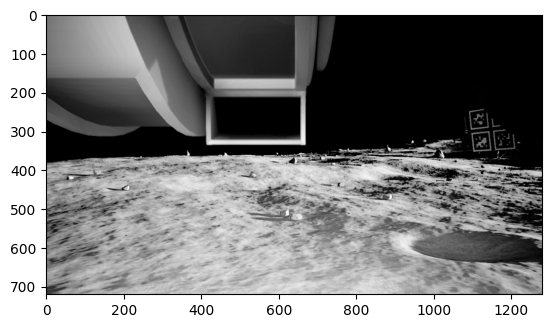

Predicting 1 masks
Predicted 1 masks
0.48303878
0.37022537
0.47158825
0.46915543
0.3738758


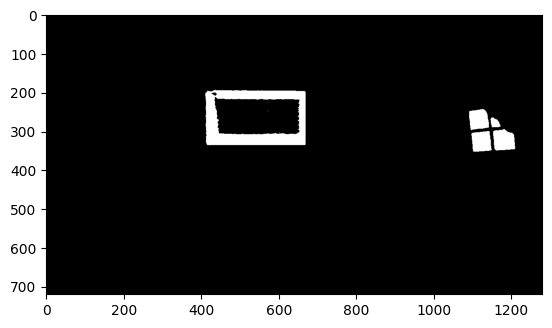

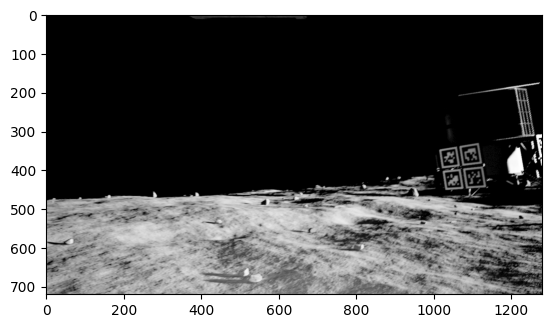

Predicting 1 masks
Predicted 1 masks
0.53679854
0.54939884
0.5636182
0.55109054


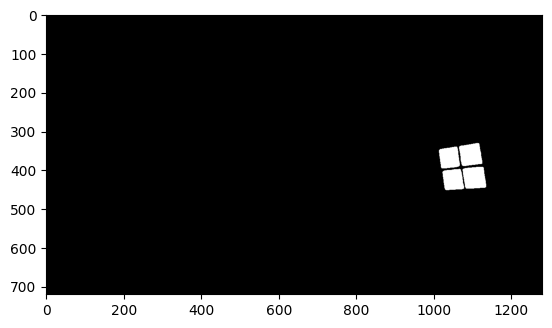

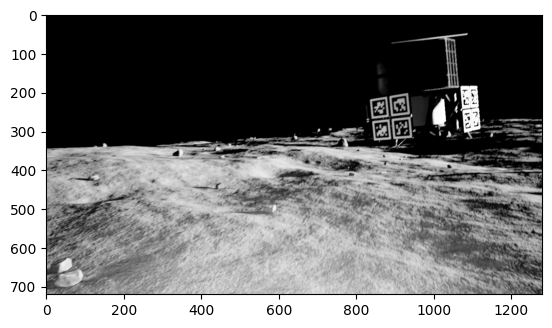

Predicting 1 masks
Predicted 1 masks
0.52755994
0.52305496
0.51866806
0.515437
0.42871165
0.39513415
0.39373463
0.33372033
0.36477757
0.42584395


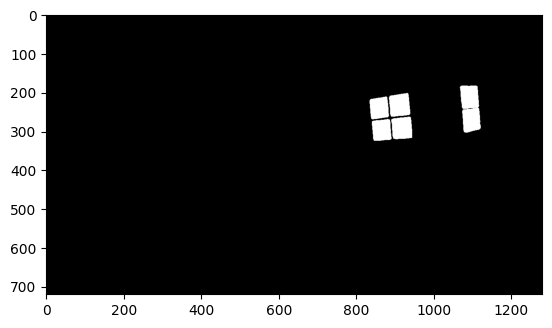

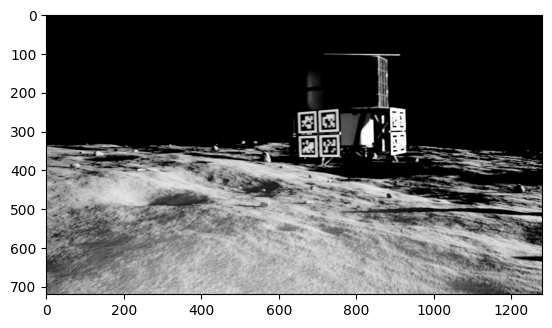

Predicting 1 masks
Predicted 1 masks
0.55953074
0.57128835
0.5549529
0.53679854
0.40544873
0.34953272


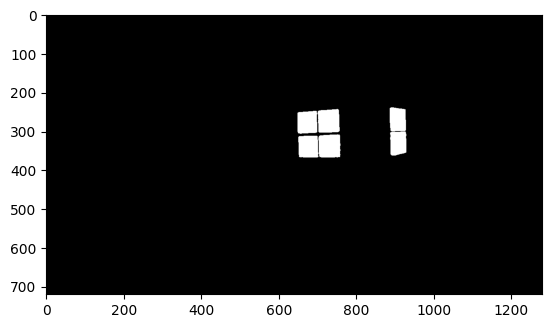

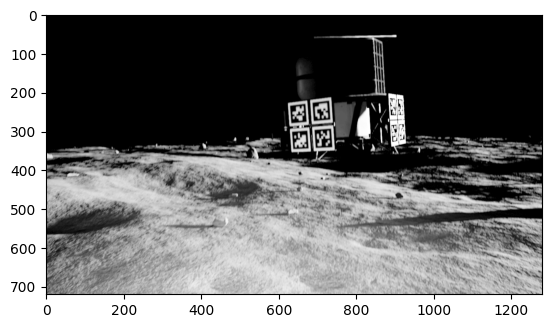

Predicting 1 masks
Predicted 1 masks
0.532182
0.53801244
0.53679854
0.5612148
0.35756752
0.4007494
0.31320965
0.33198547
0.3711366
0.36206648


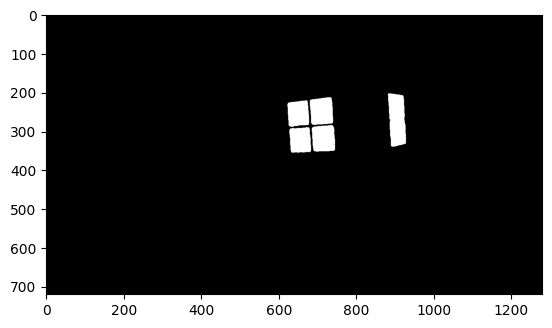

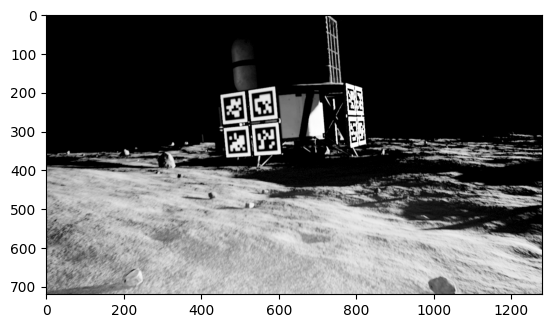

Predicting 1 masks
Predicted 1 masks
0.5822535
0.5774954
0.56985265
0.5636182
0.41063806
0.3693151
0.41822165
0.38954657


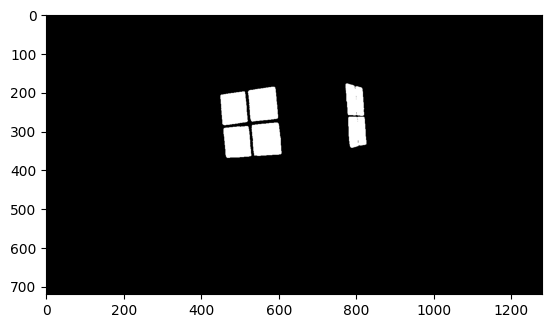

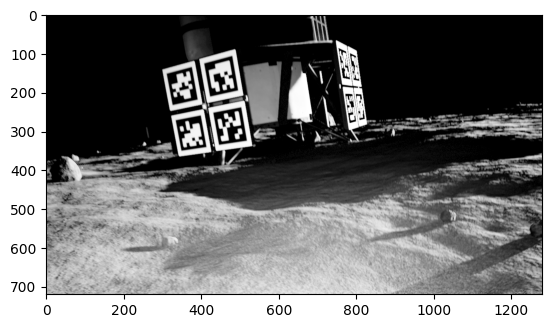

Predicting 1 masks
Predicted 1 masks
0.59690315
0.590307
0.59313804
0.597373
0.36749724
0.33895186
0.36568317
0.33807713
0.3720488
0.37662312


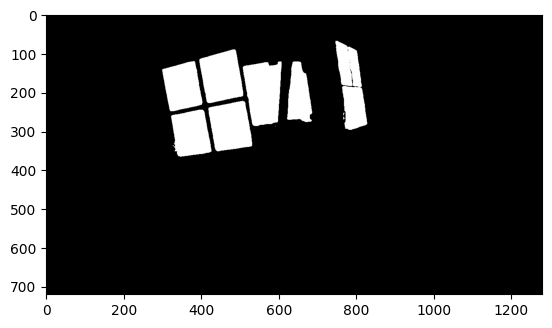

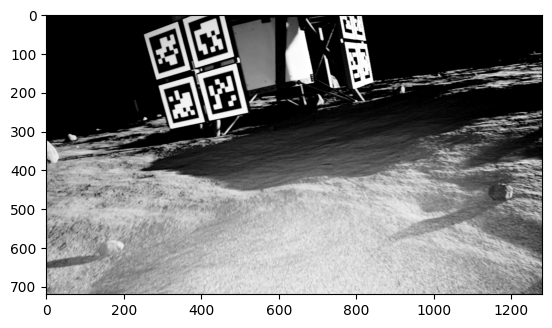

Predicting 1 masks
Predicted 1 masks
0.5688949
0.53704137
0.57654196
0.55615854
0.3242354
0.3242354


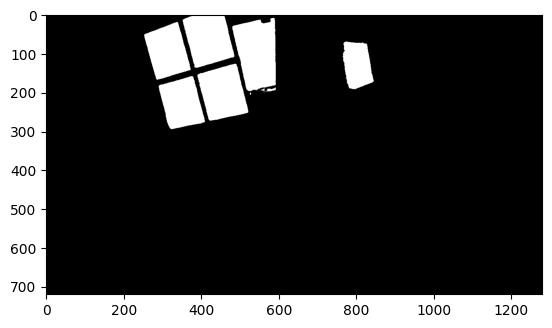

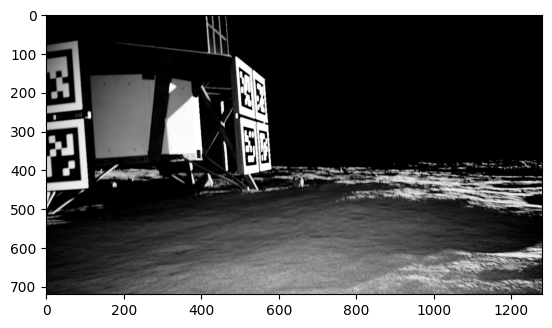

Predicting 1 masks
Predicted 1 masks
0.43062615
0.45374593
0.42202815
0.42775524
0.4390257
0.42775524
0.35846534
0.35846534


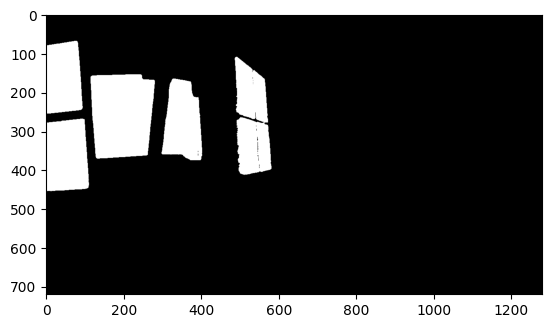

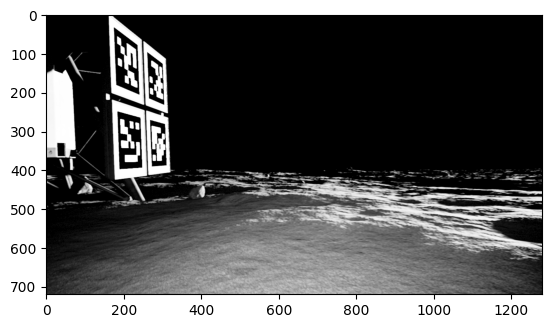

Predicting 1 masks
Predicted 1 masks
0.5197651
0.51939946
0.52147114
0.50445545


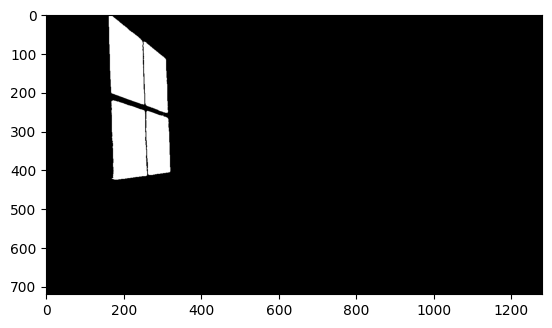

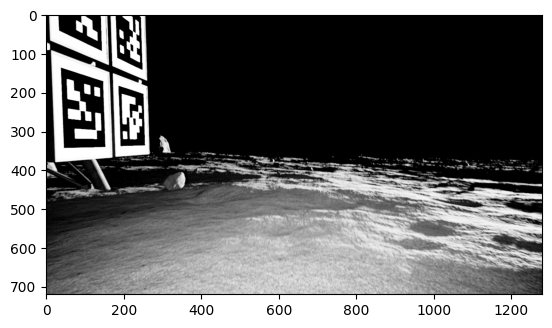

Predicting 1 masks
Predicted 1 masks
0.50848305
0.5133635
0.5355843
0.5301149


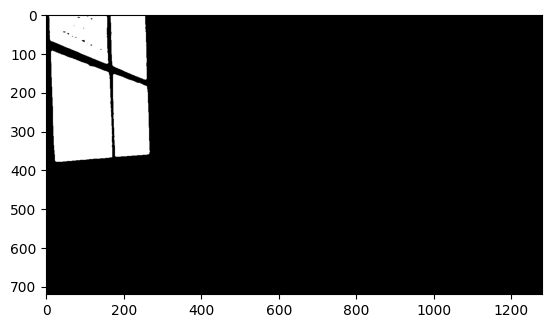

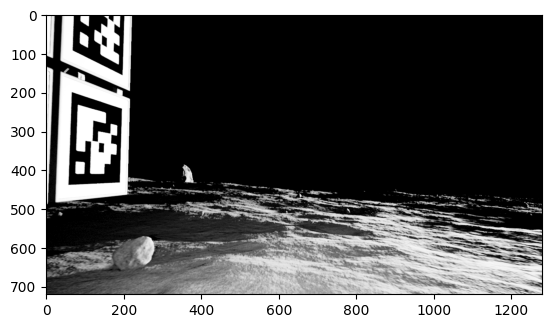

Predicting 1 masks
Predicted 1 masks
0.53607005
0.47901624


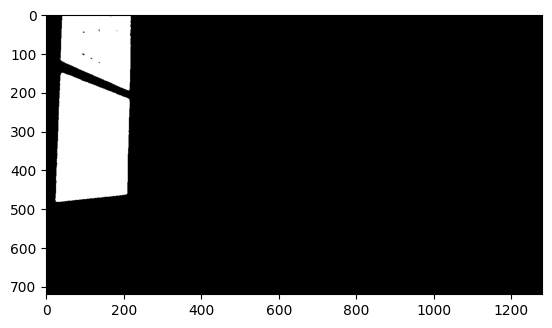

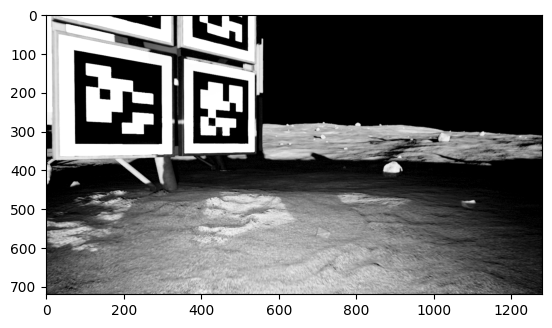

Predicting 1 masks
Predicted 1 masks
0.60346454
0.57892436
0.56169575
0.52768165


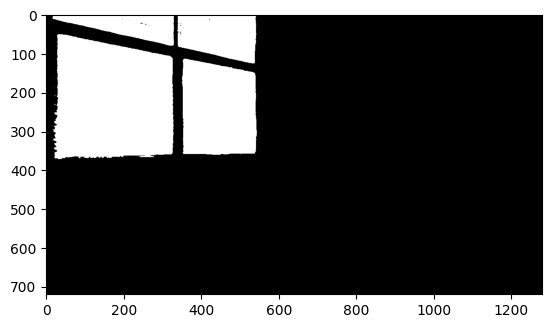

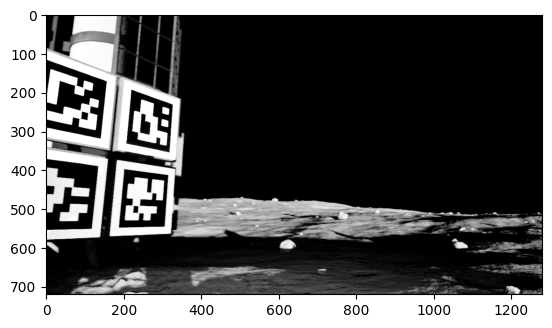

Predicting 1 masks
Predicted 1 masks
0.5851011
0.53849787
0.54140884
0.5288984


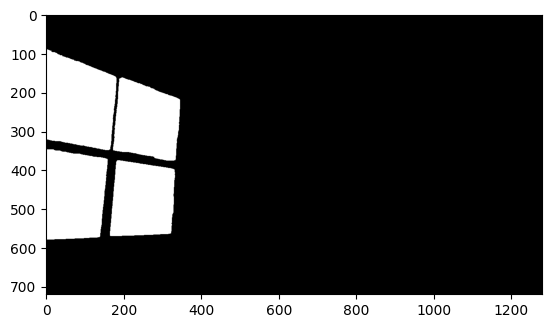

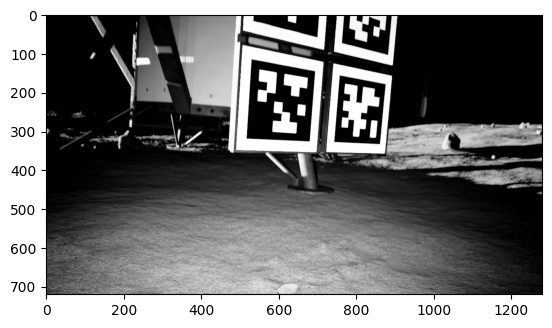

Predicting 1 masks
Predicted 1 masks
0.59643316
0.5855752
0.55302256
0.54237854


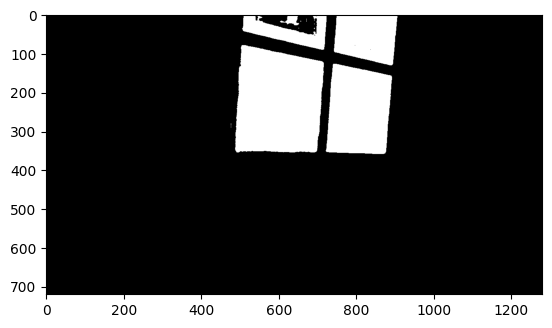

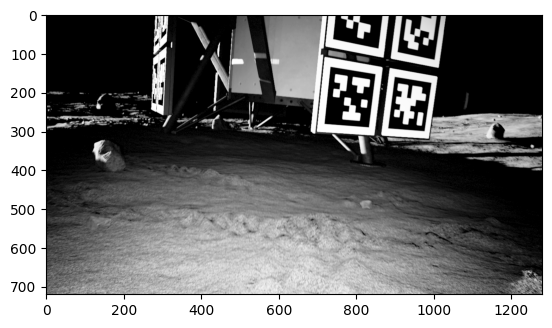

Predicting 1 masks
Predicted 1 masks
0.58604914
0.5879431
0.5484317
0.5520568


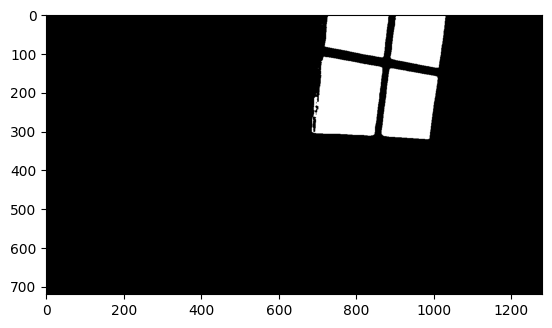

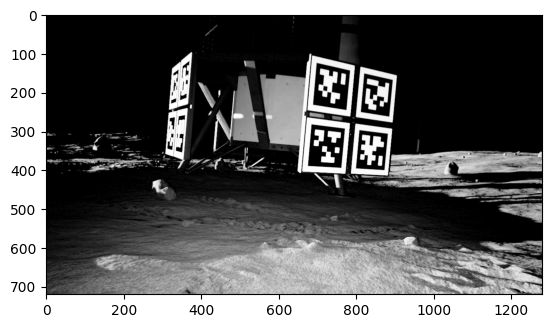

Predicting 1 masks
Predicted 1 masks
0.58082765
0.56025267
0.57701874
0.5817784
0.3711366
0.3106944
0.38352585
0.3424616
0.344223


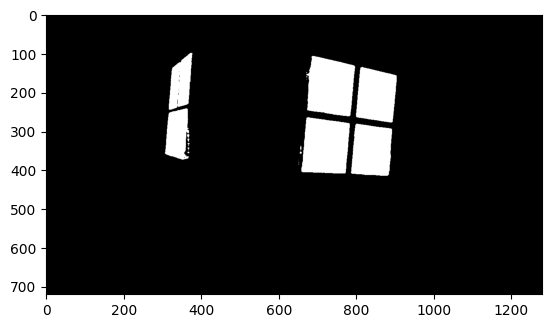

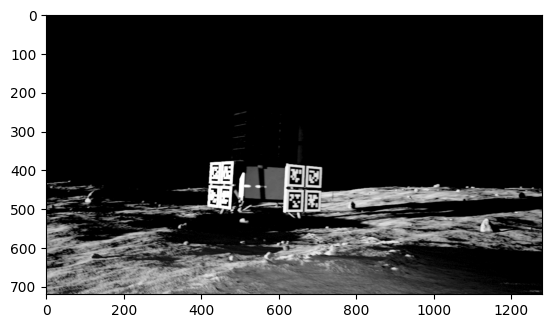

Predicting 1 masks
Predicted 1 masks
0.55229825
0.5609743
0.55229825
0.54237854
0.5065304
0.48084432
0.4696419
0.48291677
0.30652705
0.3106944


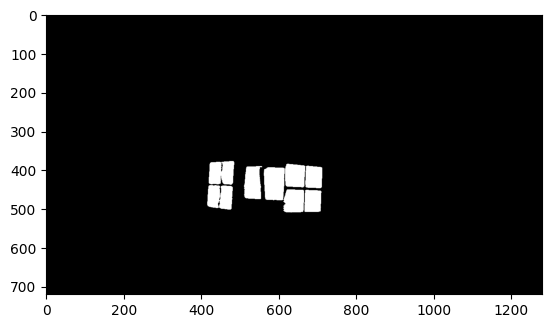

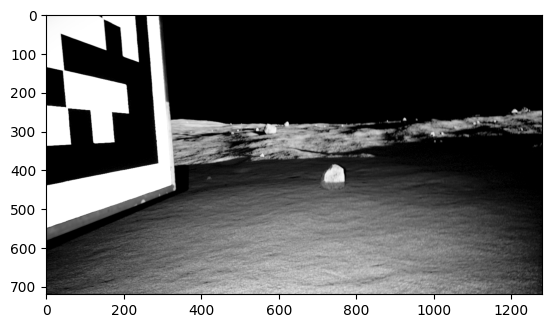

Predicting 1 masks
Predicted 1 masks
0.4380639
0.3208213


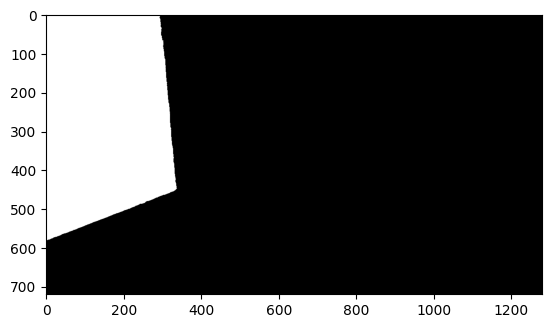

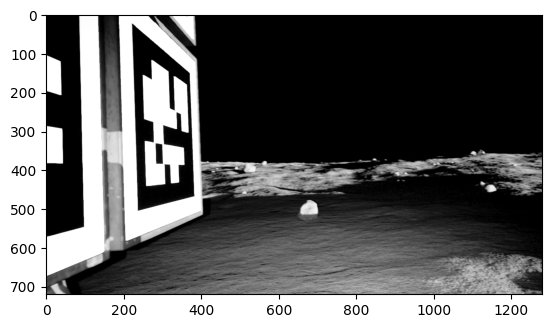

Predicting 1 masks
Predicted 1 masks
0.48255107
0.31573597


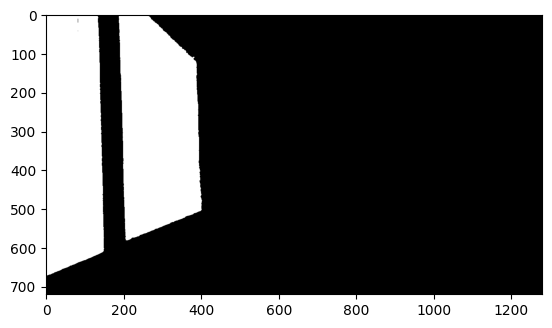

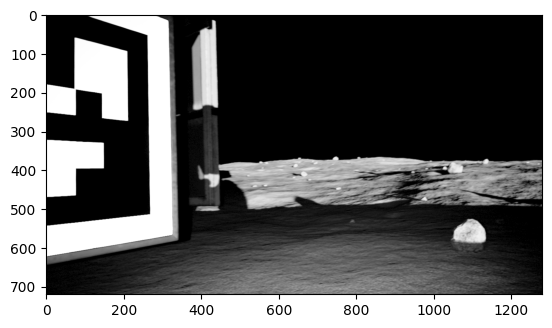

Predicting 1 masks
Predicted 1 masks
0.51080155


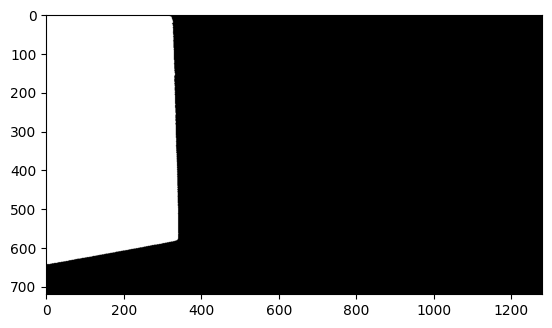

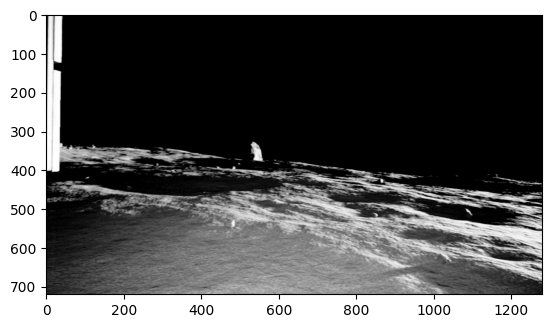

Predicting 1 masks
Predicted 1 masks
0.3242354


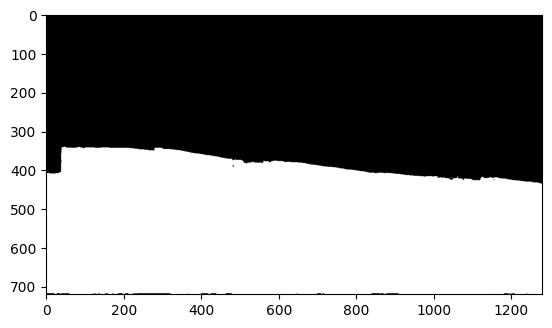

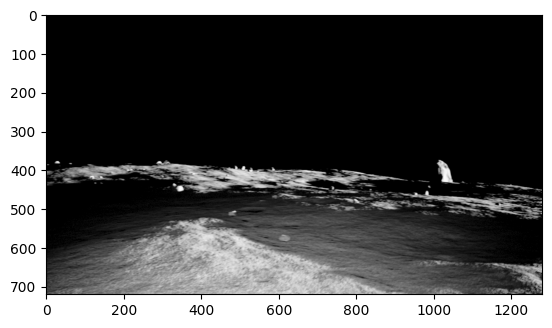

Predicting 1 masks
Predicted 1 masks
0.3276683


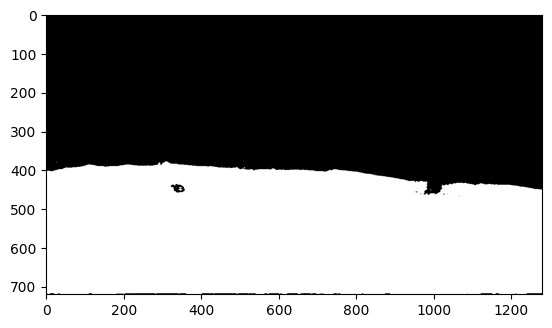

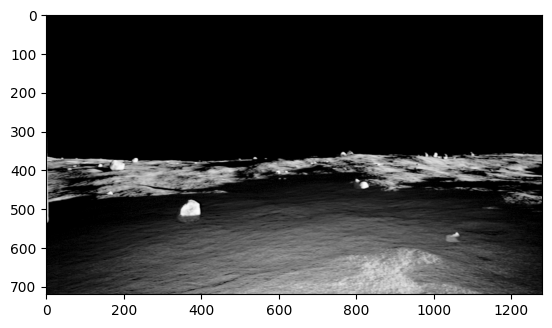

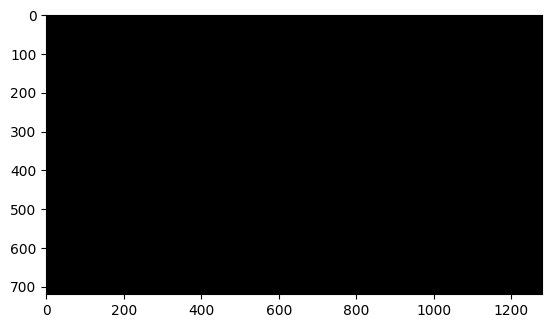

In [87]:
from lang_sam import LangSAM
from cv2 import solvePnP

model = LangSAM()
text_prompt = "square."
# text_prompt = "four squares."
SEG_SCORE_THRESH = 0.4 # requires more testing
 
for ind in i:
    I1 = cv.imread(os.path.join(data_path, "FrontLeft", f"{ind}.png"), cv.IMREAD_GRAYSCALE)
    plt.imshow(I1, cmap="gray")
    plt.show()

    image_seg_in = Image.open(os.path.join(data_path, "FrontLeft", f"{ind}.png")).convert("RGB")
    results = model.predict([image_seg_in], [text_prompt])
    full_mask = np.zeros_like(image_seg_in).copy()
    for i, mask in enumerate(results[0]["masks"]):
        print(results[0]["scores"][i])
        # if results[0]["scores"][i] < SEG_SCORE_THRESH: 
        #     continue
        full_mask[mask.astype(bool)] = 255

    plt.imshow(full_mask, cmap="gray")
    plt.show()


In [88]:
# known fiducial corner positions
fiducial_group_corners = json.load(open(os.path.expanduser("~/LunarAutonomyChallenge/docs/geometry.json")))["lander"]["fiducials"]
geom_fid_a = fiducial_group_corners["a"]
geom_fid_d = fiducial_group_corners["d"] 


In [89]:
# extract ground truth data trajectory
data_log_path = os.path.join(data_path, "data_log.json")
data_log = json.load(open(data_log_path))
lander_pose_rover = np.array(data_log["lander_pose_rover"])
lander_pose_world = np.array(data_log["lander_pose_world"])

In [90]:
lander_pose

array([[-5.17644501e-02,  9.98542415e-01,  1.52802708e-02,
         6.70792341e+00],
       [-9.98654785e-01, -5.18042791e-02,  2.22209108e-03,
        -3.87358046e+00],
       [ 3.01043561e-03, -1.51446902e-02,  9.99880781e-01,
         4.96357679e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [91]:
lander_pose[0:3, 0:3]

array([[-0.05176445,  0.99854242,  0.01528027],
       [-0.99865478, -0.05180428,  0.00222209],
       [ 0.00301044, -0.01514469,  0.99988078]])

In [92]:
data_log

{'initial_pose': [[0.9655962358136375,
   -0.25537721948567055,
   0.04905491973596509,
   -9.390570640563965],
  [0.25850286175273557,
   0.9631532876890797,
   -0.07424294498040249,
   2.8546016216278076],
  [-0.028287450365495896,
   0.08436954534359334,
   0.9960329311676072,
   1.864681601524353],
  [0.0, 0.0, 0.0, 1.0]],
 'lander_pose_rover': [[0.9658938803361616,
   0.2583454771480692,
   -0.017510750020753994,
   8.343568801879883],
  [-0.25497241668362736,
   0.9607135120626623,
   0.10962944162375282,
   -5.188319206237793],
  [0.04514508455705473,
   -0.10142564851831878,
   0.9938182727053146,
   0.1846098005771637],
  [0.0, 0.0, 0.0, 1.0]],
 'lander_pose_world': [[0.999992230365652,
   -0.0008623522064565041,
   0.0038464993177404136,
   -1.746057375484611e-05],
  [0.0007571067885814254,
   0.9996275616766745,
   0.027279382794654583,
   0.0005853578091801204],
  [-0.0038685911699275766,
   -0.027276258633079295,
   0.9996204478287456,
   1.3748046214335],
  [0.0, 0.0, 0.0

# Using fiducials
